In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import re
from matplotlib import dates
import matplotlib.font_manager as font_manager
import matplotlib.pyplot as plt
font_path = '/Library/Fonts/NotoSansTibetanRegular.ttf'
prop = font_manager.FontProperties(fname=font_path)
pd.options.display.float_format = '{:.5f}'.format
data = "/Users/luci031/Desktop/Coding/g_auction"
import warnings

# 경고메세지 끄기
warnings.filterwarnings(action='ignore')

In [103]:
# matplotlib 폰트설정
plt.rc('font', family='AppleGothic') # For MacOS
# plt.rc('font', family='NanumGothic') # For Windows
print(plt.rcParams['font.family'])

%matplotlib inline
# 브라우저에서 바로 이미지를 그린다.

plt.rcParams['axes.unicode_minus'] = False

['AppleGothic']


In [104]:
# 보기 옵션
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 50)

In [105]:
df = pd.read_parquet("/Users/luci031/Desktop/Coding/g_auction/data_ingredients/auction_total3.parquet")
df_org = pd.read_csv("/Users/luci031/Desktop/Coding/g_auction/data_origin/auction_202002.csv",encoding='euc_kr')

In [106]:
df['year'] = df['reg_date'].dt.year
df['month'] = df['reg_date'].dt.month
df['week'] = df['reg_date'].dt.week
df['day'] = df['reg_date'].dt.day

# 데이터 분포

In [108]:
df['prd'].value_counts()

고추      395203
버섯      302357
오이      247009
토마토     209655
호박      202193
         ...  
상황버섯         1
꼬시래기         1
노래미          1
우엉대          1
칼조개          1
Name: prd, Length: 329, dtype: int64

In [87]:
df.describe()

,class,scale,price,price_kg,year,month,week,day
count,4751864.00000,4751864.00000,4751864.00000,4751864.00000,4751864.00000,4751864.00000,4751864.00000,4751864.00000
mean,1.82611,62.19389,139436.35210,3552.46590,2020.30757,7.16804,29.30218,15.97057
std,1.86062,1448.42241,989202.96501,8192.60162,1.34789,3.25959,14.26075,8.79380
min,1.00000,0.01000,500.00000,0.08000,2018.00000,1.00000,1.00000,1.00000
25%,1.00000,6.00000,12000.00000,1258.33000,2019.00000,5.00000,18.00000,8.00000
50%,1.00000,15.00000,32000.00000,2270.97500,2020.00000,7.00000,30.00000,16.00000
75%,2.00000,40.00000,95000.00000,4083.33000,2022.00000,10.00000,42.00000,24.00000
max,9.00000,465138.00000,247011400.00000,7757360.00000,2022.00000,12.00000,53.00000,31.00000


# 품목별 가격 분포

## 함수 생성

In [109]:
# 전체 분포
dics1 = {'오이':(4,7),
        '고추':(6,11),
        '토마토':(7,9),
        '무':(10,12),
        '배추':(11,12),
        '딸기':(1,5)}

dics2 = {'오이':(100,10000),
        '고추':(100,20000),
        '토마토':(100,20000),
        '무':(100,10000),
        '배추':(100,10000),
        '딸기':(100,20000)}

prd_color = {'오이':'#6ab04c',
            '고추':'#eb4d4b',
            '배추':'#f0932b'}

# prd_color = {'오이':['#badc58',(186, 220, 88,1)],
#             '고추':['#eb4d4b',(235, 77, 75,1)],
#             '배추':['#22a6b3',(34, 166, 179,1)]}

In [110]:
# 거래량, 거래 가격, 평균 kg 당 가격, 판매 등급
def prd_info(df,prd,nums1,nums2,fig=(24,5)):
    if prd in prd_color:
        prd_c = prd_color[prd]
    else:
        prd_c = '#3498db'
        #prd_c = ['#3498db',(52, 152, 219, 1)]
        # matplotlib 폰트설정
    plt.rc('font', family='AppleGothic') # For MacOS
    # plt.rc('font', family='NanumGothic') # For Windows
    plt.rcParams['font.family']

    %matplotlib inline
    # 브라우저에서 바로 이미지를 그린다.

    plt.rcParams['axes.unicode_minus'] = False

    a = df[df['prd']==prd].groupby('reg_date').sum().reset_index()[['reg_date','scale','price']]
    b = df[df['prd']==prd].groupby('reg_date').mean().reset_index()[['reg_date','class','price_kg']]
    c = a.merge(b)
    c = c.rename(columns= {'scale':'total_scale','price':'total_price','class':'avg_class','price_kg':'avg_price_kg'})

    plt.figure(figsize=fig,facecolor="white")
    #plt.subplot(4,1,1)
    plt.rc('font', size=13)
    plt.rc('ytick', labelsize=10) 
    plt.title(f'일간 {prd} 총 거래량 (kg) (제철: {nums1}~{nums2}월)')
    aaa = plt.plot(c['reg_date'],c['total_scale'],color=prd_c)
    plt.fill_between(c['reg_date'],c['total_scale'],where=(c['reg_date'].dt.month>=nums1) & (c['reg_date'].dt.month<=nums2),color=prd_c)
    plt.ylim(0,max(c['total_scale'])*1.1)
    ax = plt.gca()
    current_values = plt.gca().get_yticks()
    plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])
    ax.xaxis.set_major_locator(dates.MonthLocator(interval=4))
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=fig,facecolor="white")
    # plt.subplot(4,1,2)
    plt.rc('font', size=13)
    plt.rc('ytick', labelsize=10) 
    plt.title(f'일간 {prd} 총 거래 가격(원) (제철: {nums1}~{nums2}월)')
    aaa = plt.plot(c['reg_date'],c['total_price'],color=prd_c)
    plt.fill_between(c['reg_date'],c['total_price'],where=(c['reg_date'].dt.month>=nums1) & (c['reg_date'].dt.month<=nums2),color=prd_c)
    plt.ylim(0,max(c['total_price'])*1.1)
    ax = plt.gca()
    current_values = plt.gca().get_yticks()
    plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])
    ax.xaxis.set_major_locator(dates.MonthLocator(interval=4))
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=fig,facecolor="white")
    # plt.subplot(4,1,3)
    plt.rc('font', size=13)
    plt.rc('ytick', labelsize=10) 
    plt.title(f'일간 {prd} 평균 kg 당 가격 (제철: {nums1}~{nums2}월)')
    aaa = plt.plot(c['reg_date'],c['avg_price_kg'],color=prd_c)
    plt.fill_between(c['reg_date'],c['avg_price_kg'],where=(c['reg_date'].dt.month>=nums1) & (c['reg_date'].dt.month<=nums2),color=prd_c)
    plt.ylim(0,max(c['avg_price_kg'])*1.1)
    ax = plt.gca()
    current_values = plt.gca().get_yticks()
    plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])
    ax.xaxis.set_major_locator(dates.MonthLocator(interval=4))
    plt.tight_layout()
    plt.show()
    # plt.subplot(4,1,4)
    # plt.rc('font', size=13)
    # plt.rc('ytick', labelsize=10) 
    # plt.title(f'일간 {prd} 평균 판매 등급 (제철: {nums1}~{nums2}월)')
    # aaa = plt.plot(c['reg_date'],c['avg_class'])
    # plt.fill_between(c['reg_date'],c['avg_class'],where=(c['reg_date'].dt.month>=nums1) & (c['reg_date'].dt.month<=nums2))
    # plt.ylim(1,max(c['avg_class'])*1.1)
    # ax = plt.gca()
    # ax.xaxis.set_major_locator(dates.MonthLocator(interval=4))
    # plt.tight_layout()
    # plt.show()

In [111]:
# 분포 함수 선언
def dist(df,prd,column):
    plt.rcParams['font.family'] = 'AppleGothic'
    fig, ax = plt.subplots(ncols=2, figsize=(12,6))
    display(df[df['prd']==prd][column].describe())
    sns.set_theme(style='whitegrid')
    a = sns.violinplot(y=df[df['prd']==prd][column],fmt='g', ax=ax[0])
    plt.ticklabel_format(style='plain', axis='y')
    b = sns.boxplot(y=df[df['prd']==prd][column], ax=ax[1])
    plt.ticklabel_format(style='plain', axis='y')
    a.set_title(prd)
    b.set_title(prd)
    plt.show()

In [112]:
# 이상치 확인 및 제거
def del_outlier(df,prd,price1,price2):
    display(f'{price1}원 이하 항목 ({df[(df["prd"]==prd)&(df["price_kg"]<price1)]["price_kg"].count()}개)')
    display(df[(df['prd']==prd)&(df['price_kg']<price1)].head(5))
    display(f'{price2}원 이상 항목 ({df[(df["prd"]==prd)&(df["price_kg"]>price2)]["price_kg"].count()}개)')
    display(df[(df['prd']==prd)&(df['price_kg']>price2)].sort_values('price_kg').head(5))
    df.drop(df[(df['prd']==prd)&(df['price_kg']<price1)].index,inplace=True)
    df.drop(df[(df['prd']==prd)&(df['price_kg']>price2)].index,inplace=True)

In [113]:
def year_avg(df,prd,num1,num2,column):
    if prd in prd_color:
        prd_c = prd_color[prd]
    else:
        prd_c = '#3498db'
        #prd_c = ['#3498db',(52, 152, 219, 1)]
            # matplotlib 폰트설정
    plt.rc('font', family='AppleGothic') # For MacOS
    # plt.rc('font', family='NanumGothic') # For Windows
    plt.rcParams['font.family']

    %matplotlib inline
    # 브라우저에서 바로 이미지를 그린다.
    k = df[df['prd']==prd].groupby(['month','day']).mean().reset_index()
    k['date'] = ''
    names = []
    nums = 0
    for i in range(len(k)):
        k['date'][i] = str(k.iloc[i][0])+'/'+str(k.iloc[i][1])
        if k.iloc[i][0] != nums:
            nums = k.iloc[i][0]
            names.append(str(k.iloc[i][0])+'/'+str(k.iloc[i][1]))
        else:
            names.append('')
    plt.figure(figsize=(24,4),facecolor="white")
    plt.rc('font', size=13)
    plt.rc('ytick', labelsize=10) 
    plt.title(f'연간 {prd} 평균 거래 가격 (kg) (제철: {num1}월~{num2}월)')
    aaa = plt.plot(k['date'],k[column],color=prd_c)
    if num1 <= num2:
        plt.fill_between(k['date'],k[column],where=(k['month']>=num1) & (k['month']<=num2),color=prd_c)
    else:
        plt.fill_between(k['date'],k[column],where=(k['month']<=num1) & (k['month']>=num2),color=prd_c)
    plt.ylim(0,max(k[column])*1.1)
    plt.xticks(k['date'],names)
    plt.show()
    
    display('제철 및 비제철 기간 평균 kg 당 가격 차이')
    df_sn = df[(df['prd']==prd)&(df['reg_date'].dt.month>=num1)&(df['reg_date'].dt.month<=num2)]
    df_nsn = df[(df['prd']==prd)&((df['reg_date'].dt.month<num1)|(df['reg_date'].dt.month>num2))]
    sn_kg = round(df_sn["price_kg"].mean(),2)
    nsn_kg = round(df_nsn["price_kg"].mean(),2)
    display(f'{prd} 제철 기간 평균 kg당 가격: {sn_kg}원')
    display(f'{prd} 비제철 기간 평균 kg당 가격: {nsn_kg}원')
    szn = plt.bar(['제철','비제철'],[sn_kg,nsn_kg],color=[prd_c,'#95a5a6'])
    plt.ylim(0,max(sn_kg,nsn_kg)*1.1)
    plt.bar_label(szn)
    plt.show()


In [114]:
# 품질별 가격 차이
def quality(df,prd):
            # matplotlib 폰트설정
    plt.rcParams['font.family'] = 'AppleGothic'
    # plt.rc('font', family='NanumGothic') # For Windows

    %matplotlib inline
    # 브라우저에서 바로 이미지를 그린다.

    plt.rcParams['axes.unicode_minus'] = False
    pd.set_option('mode.chained_assignment',  None)
    colors = ['#eb2f06','#eb2f06','#fa983a','#b8e994','#78e08f','#60a3bc','#4a69bd','#6a89cc','#0c2461']
    wedgeprops={'width': 0.65, 'edgecolor': 'w', 'linewidth': 0.5}
    plt.figure(figsize=(10,5),facecolor='white')
    plt.subplot(1,2,1)
    plt.title(f"품질별 {prd} 평균 kg 당 가격 (원)")
    a = df[df['prd']==prd].groupby('class').mean()['price_kg'].sort_index()
    plt.bar(a.index,a.values,color=colors)
    plt.xticks(a.index,rotation=25)
    plt.xticks(a.index)

    plt.subplot(1,2,2)
    plt.title(f"품질별 {prd} 총 생산량 (kg)")
    b = df[df['prd']==prd].groupby('class').sum()['scale'].sort_index().reset_index()
    idxs = list(b['class'])
    vals = list(b['scale'])
    plt.xticks(rotation=25)
    qq = plt.barh(idxs,vals,color=colors)
    plt.gca().invert_yaxis()
    current_values = plt.gca().get_xticks()
    plt.bar_label(qq,labels=[f"{round(k/sum(b['scale'])*100,1)}% ({round(k,1)}kg)" for k in qq.datavalues],fontsize=8,padding=3)
    plt.yticks(idxs)
    # for i in range(len(idxs)):
    #     plt.text(idxs[i],vals[i],f"{round(vals[i]/sum(vals)*100,1)}% ({round(vals[i],2)}kg)")
    plt.gca().set_xticklabels(['{:.0f}kg'.format(x) for x in current_values])
    plt.show()

In [115]:
# 친환경 여부 별 가격 차이
def ecos(df,prd):
            # matplotlib 폰트설정
    plt.rcParams['font.family'] = 'AppleGothic'
    # plt.rc('font', family='NanumGothic') # For Windows

    %matplotlib inline
    # 브라우저에서 바로 이미지를 그린다.

    plt.rcParams['axes.unicode_minus'] = False
    pd.set_option('mode.chained_assignment',  None)
    colors = ['#e74c3c','#e67e22','#f1c40f','#1abc9c','#27ae60','#3498db','#2980b9','#9b59b6','#8e44ad']
    wedgeprops={'width': 0.65, 'edgecolor': 'w', 'linewidth': 0.5}
    plt.figure(figsize=(10,5),facecolor='white')
    plt.subplot(1,2,1)
    plt.title(f"친환경 여부별 {prd} 평균 kg 당 가격 (원)")
    a = df[df['prd']==prd].groupby('eco').mean()['price_kg'].sort_index()
    plt.bar(a.index,a.values,color=colors)
    plt.xticks(a.index,rotation=25)
    plt.xticks(a.index)

    plt.subplot(1,2,2)
    plt.title(f"친환경 여부별 {prd} 총 생산량 (kg)")
    b = df[df['prd']==prd].groupby('eco').sum()['scale'].sort_index().reset_index()
    idxs = list(b['eco'])
    vals = list(b['scale'])
    plt.xticks(rotation=25)
    qq = plt.barh(idxs,vals,color=colors)
    plt.gca().invert_yaxis()
    current_values = plt.gca().get_xticks()
    plt.bar_label(qq,labels=[f"{round(k/sum(b['scale'])*100,1)}% ({round(k,1)}kg)" for k in qq.datavalues],fontsize=8,padding=3)
    plt.yticks(idxs)
    # for i in range(len(idxs)):
    #     plt.text(idxs[i],vals[i],f"{round(vals[i]/sum(vals)*100,1)}% ({round(vals[i],2)}kg)")
    plt.gca().set_xticklabels(['{:.0f}kg'.format(x) for x in current_values])
    plt.show()

In [116]:
#df[df['prd']==prd].groupby('class').sum()['scale'].sort_index().reset_index()

## 비교를 위한 품목 선정
- 가장 거래량이 많은 단일 품목 5개
- 김장철 핵심 재료 5개

In [117]:
# 거래량 조회
df.groupby('prd').sum().sort_values('scale',ascending=False).head(10)

,class,scale,price,price_kg,year,month,week,day
prd,,,,,,,,
무,100854,96816034.70000,55743937439,92188450.56000,150296014,562847,2311233,1185200
오이,473226,21790163.46000,37489842955,373376931.25000,499032229,1756967,7179331,3933246
버섯,596626,16091830.81000,93829568341,1194320241.74000,610851552,2126199,8672712,4841972
고추,641063,14358619.38000,52053164067,1311442229.30000,798402634,2994594,12290107,6307899
호박,422751,9948645.46000,15306861598,265235382.65000,408487884,1531184,6282642,3225694
감자,238369,7380077.14000,8149803392,85278427.34000,184914920,625035,2551492,1460647
참외,77484,7360797.00000,21454523288,59552633.76000,47675355,136341,548873,370954
사과,132592,7041724.37000,18017289520,209817661.25000,172509239,653277,2688038,1354088
복숭아,252658,6236737.80000,17947174650,396808017.77000,245185749,918531,3765070,1911486


- 버섯은 품목 종류가 다양하므로 제외
- 김장 품목들은 따로 작성
  
- 최종 항목 선정 및 사유
  값 | 제철 | 보관 기간 | 김장 | 선정 사유 |
	:---:|:---:|:---:|:---:|---|
	`오이` | 4~7월 | 5~10일 | X | 제철 기간이 다른 상품들과 다르고, 데이터 또한 많다 
	`고추` | 6~11월 | 4~5일 | X | 제철 기간이 긴 편이고, 변동 폭이 크다
	`토마토` | 7~9월 | 7일 | X | 가격 비교에 적절한 과일
	`무` | 10~12월 | 5~7일 | O | 대표적인 김장 재료
	`배추` | 11~12월 | 15일 | O | 대표적인 김장 재료 + 긴 보관기간

# 품목별 탐색

'이상치 처리'

'처리 전'

count    136100.00000
mean       1162.56660
std        6513.01991
min           4.02000
25%         525.00000
50%         885.97000
75%        1421.43000
max     2317652.63000
Name: price_kg, dtype: float64

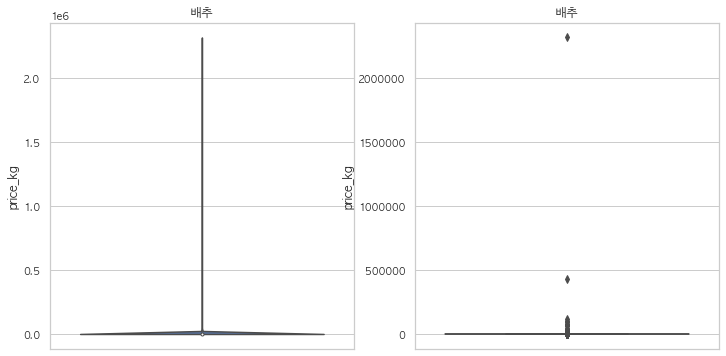

'100원 이하 항목 (367개)'

,state,city,prd,eco,reg_date,class,scale,price,price_kg,year,month,week,day
95037,강원,영월,배추,normal,2018-11-28,2,10.00000,800,80.00000,2018,11,48,28
96597,강원,영월,배추,normal,2018-07-04,2,10.00000,900,90.00000,2018,7,27,4
96874,강원,영월,배추,normal,2021-06-29,2,12.00000,900,75.00000,2021,6,26,29
668858,경남,함안,배추,normal,2019-05-22,2,10.00000,900,90.00000,2019,5,21,22
697634,경북,문경,배추,normal,2021-12-30,1,20.00000,1500,75.00000,2021,12,52,30


'10000원 이상 항목 (249개)'

,state,city,prd,eco,reg_date,class,scale,price,price_kg,year,month,week,day
4179105,경북,영양,배추,normal,2019-10-14,1,11.00000,110100,10009.09000,2019,10,42,14
3923947,경북,김천,배추,normal,2018-08-09,1,6.00000,60200,10033.33000,2018,8,32,9
4191074,경북,안동,배추,normal,2021-09-15,1,5.00000,50200,10040.00000,2021,9,37,15
3924503,경북,김천,배추,normal,2021-09-27,1,4.00000,40200,10050.00000,2021,9,39,27
3619222,강원,정선,배추,normal,2020-09-12,1,56.00000,563300,10058.93000,2020,9,37,12


'처리 후'

count   135484.00000
mean      1114.60127
std        909.98255
min        100.00000
25%        528.22500
50%        887.50000
75%       1418.75000
max      10000.00000
Name: price_kg, dtype: float64

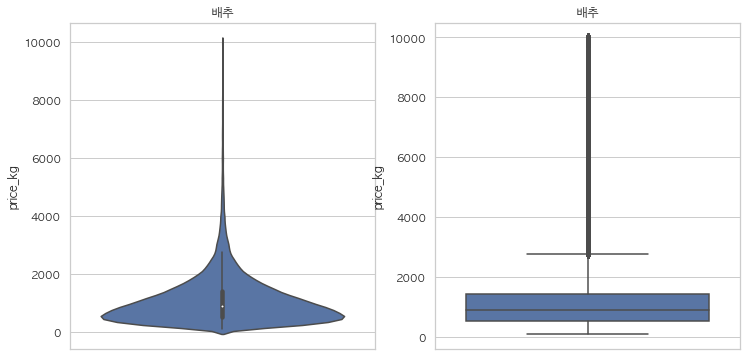

'일간 배추 유통 흐름'

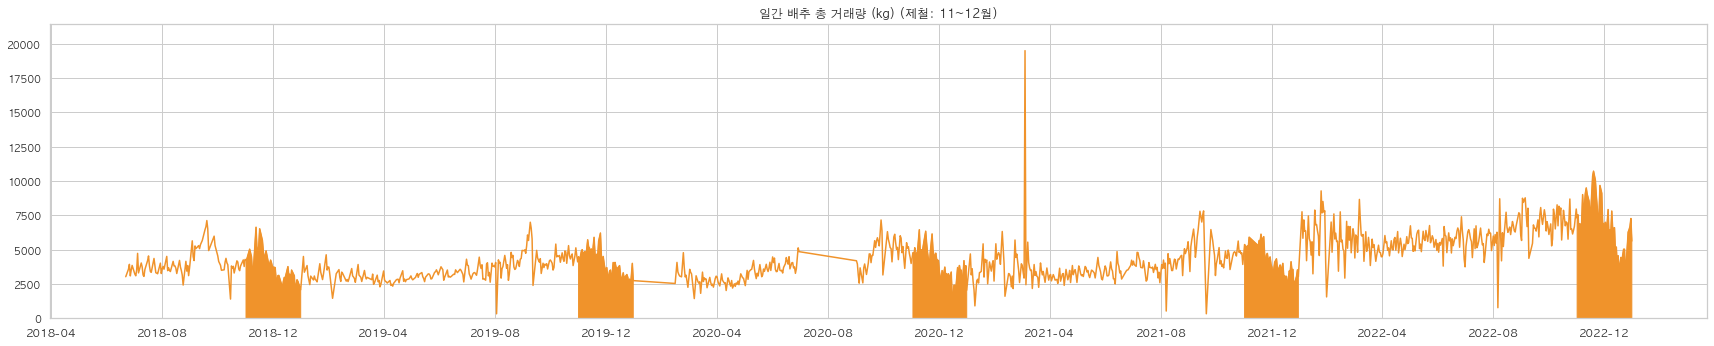

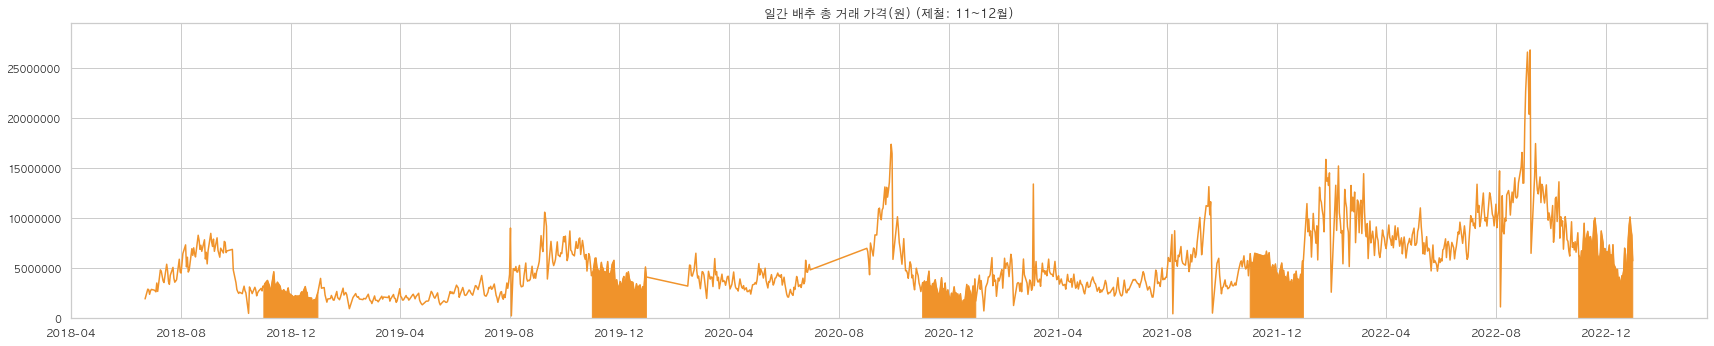

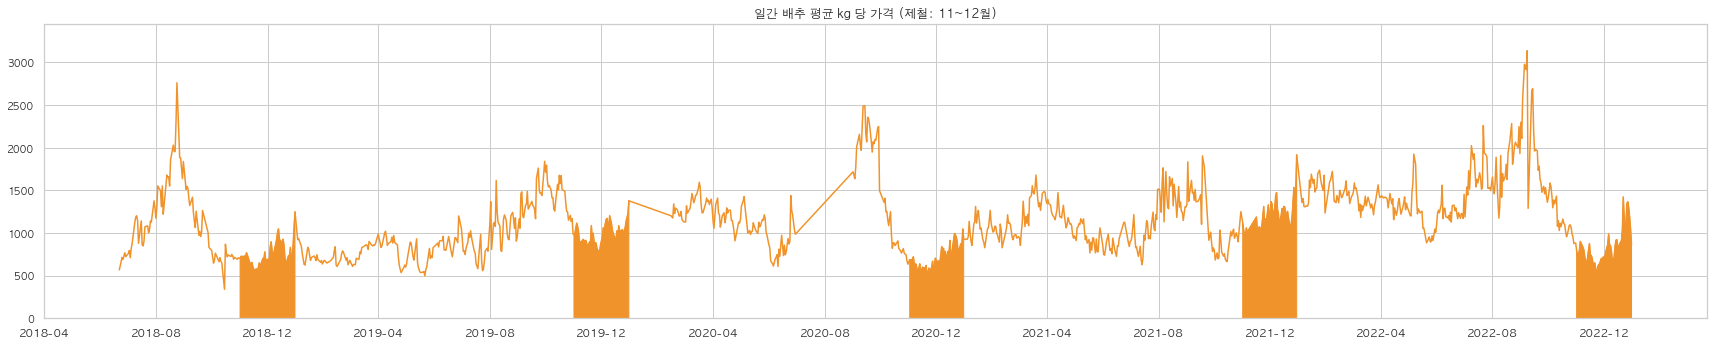

'연간 배추 평균 가격'

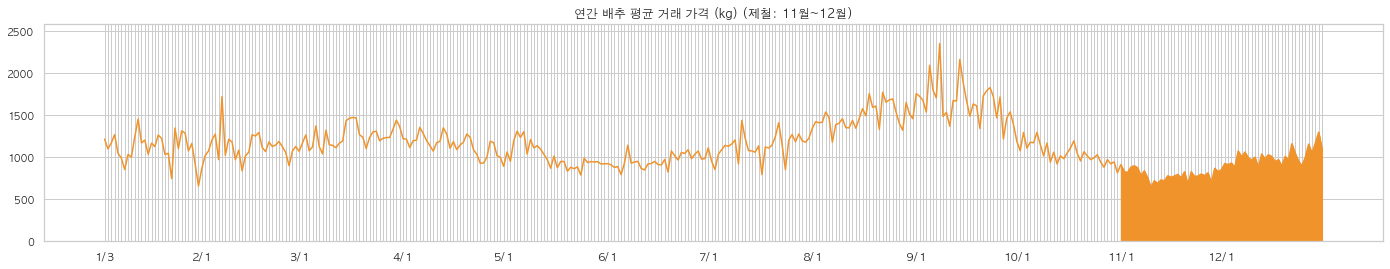

'제철 및 비제철 기간 평균 kg 당 가격 차이'

'배추 제철 기간 평균 kg당 가격: 875.62원'

'배추 비제철 기간 평균 kg당 가격: 1190.77원'

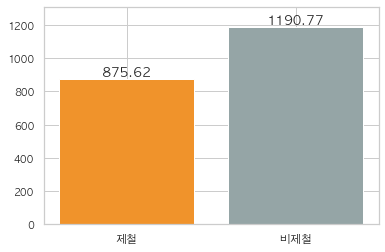

'등급별 분포'

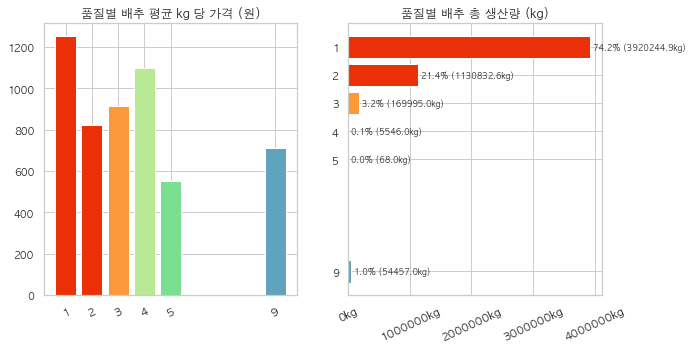

'친환경 여부별 분포'

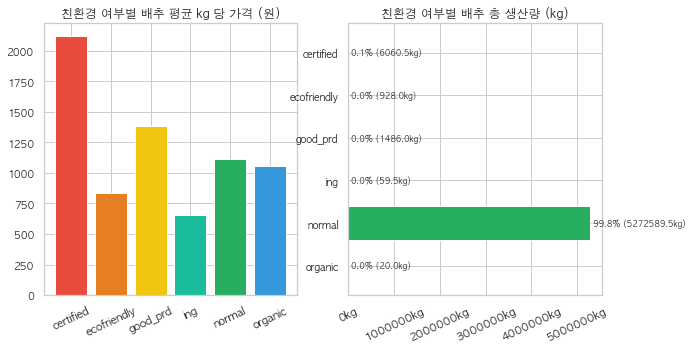

In [122]:
prd = '배추'
display('이상치 처리')
display('처리 전')
dist(df,prd,'price_kg')
del_outlier(df,prd,dics2[prd][0],dics2[prd][1])
display('처리 후')
dist(df,prd,'price_kg')
display(f'일간 {prd} 유통 흐름')
prd_info(df,prd,dics1[prd][0],dics1[prd][1])
display(f'연간 {prd} 평균 가격')
year_avg(df,prd,dics1[prd][0],dics1[prd][1],'price_kg')
display('등급별 분포')
quality(df,prd)
display('친환경 여부별 분포')
ecos(df,prd)

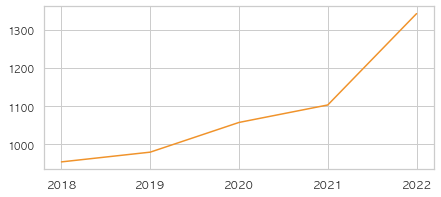

In [123]:
a = df[df['prd']==prd].groupby('year').mean()['price_kg']
fig = plt.figure(figsize=(7,3),facecolor='white')
ax = fig.add_subplot(1,1,1)
ax.plot(a.index,a.values,color=prd_color[prd])
ax.set_xticks(a.index)
plt.show()

## 구매시기 판단

In [19]:
def finder(prd,year_cnt=0,date1=(0,0),date2=(0,0),qual='n', eco='n',origin='n'):
    zzz = df[df['prd']==prd]
    years = sorted(list(df['year'].unique()))
    # year
    if 0< year_cnt <= len(years):
        years = years[-year_cnt:]
        
    # date
    if date1[0] != 0:
        results1 = pd.DataFrame()
        kk = pd.DataFrame()
        for year in years:
            time1 = pd.Timestamp(year,date1[0],date1[1])
            time2 = pd.Timestamp(year,date2[0],date2[1])
            kk = pd.concat([kk,zzz[(zzz['reg_date']>=time1) & (zzz['reg_date']<=time2)]])
        results1 = pd.concat([kk,results1])
    else:
        results1 = zzz
    
    # qual
    if qual != 'n':
        results2 = pd.DataFrame()
        aa = pd.DataFrame()        
        for q_sel in qual:
            aa = pd.concat([aa,results1[results1['class']==q_sel]])
        results2 = pd.concat([aa,results2])
    else:
        results2 = results1

    
    # eco
    if eco != 'n':
        results3 = pd.DataFrame()
        bb = pd.DataFrame()
        for q_sel in eco:
            bb = pd.concat([bb,results2[results2['eco']==q_sel]])
        results3 = pd.concat([bb,results3])
    else:
        results3 = results2
        

    # origin

    if origin != 'n':
        f_results = pd.DataFrame()
        cc = pd.DataFrame()
        for q_sel in origin:
            kk = pd.concat([kk,results3[(results3['state']==q_sel[0])&(results3['city']==q_sel[1])]])
        f_results = pd.concat([kk,f_results])
    else:
        f_results = results3

    return f_results

In [26]:
prd = '배추'
aaa = finder((prd),year_cnt=5)#,date1=(1,1),date2=(3,31))

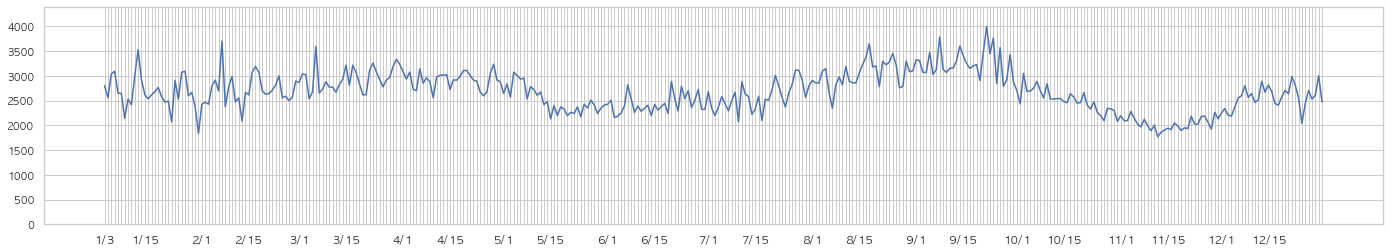

'해당 기간 내 5년간 평균 가격: 2680.38원'

'해당 기간 내 5년간 가격 편차: ±396.53원'

'해당 기간 내 5년간 최저 가격: 1768.52원 | 판매 날짜: 11/12일'

In [28]:
# matplotlib 폰트설정
plt.rc('font', family='AppleGothic') # For MacOS
# plt.rc('font', family='NanumGothic') # For Windows
plt.rcParams['font.family']
%matplotlib inline
#브라우저에서 바로 이미지를 그린다.

colors = ['#ff9f43','#f368e0','#1dd1a1','#576574','#341f97']
plt.figure(figsize=(24,4),facecolor="white")
###
k = aaa[aaa['prd']==prd].groupby(['month','day']).mean().reset_index()
k['date'] = ''
names = []
nums = 0
years = sorted(list(aaa['year'].unique()))

for i in range(len(k)):
    k['date'][i] = str(k.iloc[i][0])+'/'+str(k.iloc[i][1])
    if (k.iloc[i][0]) != nums:
        nums = (k.iloc[i][0])
        names.append(str(k.iloc[i][0])+'/'+str(k.iloc[i][1]))
    elif (k.iloc[i][1]) == 15: 
        names.append(str(k.iloc[i][0])+'/'+str(k.iloc[i][1]))
    else:
        names.append('')

plt.rc('font', size=13)
plt.rc('ytick', labelsize=10) 
plt.plot(k['date'],k['price_kg'])#color=['#0abde3','#1dd1a1'])
# plt.legend()
plt.ylim(0,max(k['price_kg']*1.1))
plt.xticks(k['date'],names)

plt.show()

display(f'해당 기간 내 {len(years)}년간 평균 가격: {round(k["price_kg"].mean(),2)}원')
display(f'해당 기간 내 {len(years)}년간 가격 편차: ±{round(k["price_kg"].std(),2)}원')
display(f'해당 기간 내 {len(years)}년간 최저 가격: {round(k["price_kg"].min(),2)}원 | 판매 날짜: {k[k["price_kg"]==(k["price_kg"].min())].values[0][-1]}일')